이중 for문의 시간복잡도를 개선하는 문제
문제 : programmers 완주하지 못한 선수
https://school.programmers.co.kr/learn/courses/30/lessons/42576

문제 설명
수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다.

마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return 하도록 solution 함수를 작성해주세요.

제한사항
마라톤 경기에 참여한 선수의 수는 1명 이상 100,000명 이하입니다.
completion의 길이는 participant의 길이보다 1 작습니다.
참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
참가자 중에는 동명이인이 있을 수 있습니다.

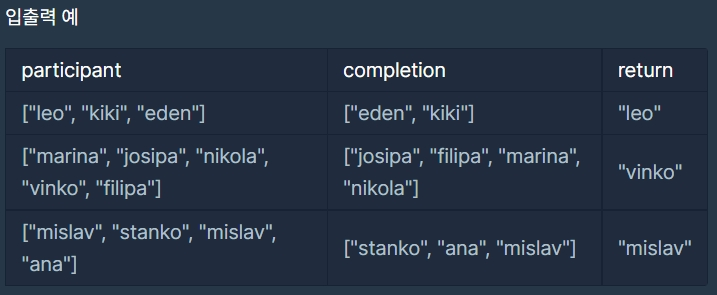

입출력 예 설명
예제 #1
"leo"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

예제 #2
"vinko"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

예제 #3
"mislav"는 참여자 명단에는 두 명이 있지만, 완주자 명단에는 한 명밖에 없기 때문에 한명은 완주하지 못했습니다.

In [20]:
# 런타임 에러나는 코드 
participant = ["marina", "josipa", "nikola", "vinko", "filipa"]
completion = ["josipa", "filipa", "marina", "nikola"]

def solution(participant, completion):
    answer = ''
    for name in completion:
        for idx, string in enumerate(participant):
            if(name == string):
                participant.pop(idx)
    answer = participant[0]
    return answer


solution(participant, completion)

'vinko'

In [25]:
# 개선 코드
# 이경우 중복된 이름에서 문제가 생긴다. 왜
# 왜냐하면 dictionary는 중복을 허용하지 않기 때문에
# 특히 hashmap같은 자료구조와 같이 중복을 허용하지 않는 것은 주의할 것
participant = ["marina", "josipa", "nikola", "vinko", "filipa"]
completion = ["josipa", "filipa", "marina", "nikola"]

participant2 = ["marina", "josipa", "nikola", "vinko", "filipa", "marina"]
completion2 = ["josipa", "filipa", "marina", "nikola"]

def solution(participant, completion):
    answer = ''
    dict_participant = {string : i for i,string in enumerate(participant)}
    for name in completion:
        dict_participant.pop(name)
    for name in dict_participant.keys():
        answer = name
    return answer


solution(participant, completion)
solution(participant2, completion2)

'vinko'

In [29]:
## 개선된 코드
## 다만 이것은 문제에서 딱 1명의 선수만 탈락한다는 점을 이용한 묘수라서 
# 보편적인 방법은 아니다.
participant = ["marina", "josipa", "nikola", "vinko", "filipa"]
completion = ["josipa", "filipa", "marina", "nikola"]

participant2 = ["marina", "josipa", "nikola", "vinko", "filipa", "marina"]
completion2 = ["josipa", "filipa", "marina", "nikola"]

def solution(participant, completion):
    participant.sort()
    completion.sort()
    answer = [participant[i] for i in range(len(completion))  if participant[i] != completion[i]]
#     print(answer)
    if answer == []: # 아무것도 없으면 
        answer.append(participant[-1]) # 가장 마지막 선수를 뽑는다.
    return answer[0]

print(solution(participant, completion))
# print(solution(participant2, completion2))


# 테스트 1 〉    통과 (39.47ms, 18.1MB)
# 테스트 2 〉    통과 (61.19ms, 22.1MB)
# 테스트 3 〉    통과 (77.17ms, 24.8MB)
# 테스트 4 〉    통과 (78.46ms, 26.3MB)
# 테스트 5 〉    통과 (86.98ms, 26.4MB)

[]
vinko


In [30]:
# 해쉬와 레퍼런스를 사용한 방법 (중복이 제거되는 방법을 보완)
# 레퍼런스는 참조한 횟수만큼 값을 증가하고, 해제한만큼 -1해주는 메모리 관리 테크닉에서 유래
# 속도가 더 빠르다.
participant = ["marina", "josipa", "nikola", "vinko", "filipa"]
completion = ["josipa", "filipa", "marina", "nikola"]

participant2 = ["marina", "josipa", "nikola", "vinko", "filipa", "marina"]
completion2 = ["josipa", "filipa", "marina", "nikola"]

def solution(participant, completion):
    non = {} # dictionary 선언
    for i in participant:
        if i not in non:
            non[i] = 1 
        else:  # 만일 이미 중복된 이름이 있으면 값을 1씩 늘린다.
            non[i] += 1
    for j in completion:
        if j in non: # 비교해서 이름이 있으면 -1을 한다.
            non[j] -= 1

    answer_non = dict(map(reversed, non.items()))
    answer = answer_non[1]
    return answer

print(solution(participant, completion))
# print(solution(participant2, completion2))


# 테스트 1 〉	통과 (27.39ms, 21.8MB)
# 테스트 2 〉	통과 (44.93ms, 25.2MB)
# 테스트 3 〉	통과 (54.48ms, 27.5MB)
# 테스트 4 〉	통과 (68.64ms, 34MB)
# 테스트 5 〉	통과 (58.17ms, 34MB)

vinko


In [32]:
# 모범 참고 코드
# 다른 사람이 만든 코드로서 성능이 더 좋음
# hash 함수의 성능으로 돌파
def solution(participant, completion):
    answer = ''
    temp = 0
    dic = {}
    for part in participant:
        dic[hash(part)] = part
        temp += hash(part)
    for com in completion:
        temp -= hash(com)
    answer = dic[temp]

    return answer

print(solution(participant, completion))

# 테스트 1 〉	통과 (22.02ms, 23.9MB)
# 테스트 2 〉	통과 (32.69ms, 28.3MB)
# 테스트 3 〉	통과 (38.37ms, 31.4MB)
# 테스트 4 〉	통과 (45.59ms, 37.7MB)
# 테스트 5 〉	통과 (47.68ms, 37.6MB)

vinko
